# Table of contents

#### 01. Importing Visualization Libraries and Data
#### 02. Correlation Heat Map
#### 03. Scatterplots
#### 04. Pair Plot
#### 05. Categorical Plot
#### 06. Answering Previously Generated Questions
#### 07. Hypothesis Forming

# 01. Importing visualization libraries and data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#checking matplotlib version
matplotlib.__version__

'3.5.1'

In [3]:
# Ensuring plots are displayed without needing to call them
%matplotlib inline

In [5]:
#importing data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 6\Texas School Nutrition Program Analysis\02 Data'
data = pd.read_csv(os.path.join(path,'Prepared Data', 'SchoolNutritionPrograms20-21_Clean.csv'), index_col=[0]) 

In [6]:
data.head()

,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,COVIDMealSite,...,LunchServedPaid,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal
0,SCHOOLNUTRITIONPROGRAMCLAIMS,4,NECHES ISD,Educational Institution,Public,7,2,102,NECHES ELEMENTARY,NO,...,0,19,0.00,0.00,263.0,263.00,250,100.000000,0.000000,0.000000
1,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,1,PALESTINE H S,NO,...,930,0,6436.46,29107.95,0.0,35544.41,922,89.168279,59.291103,830.077369
2,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,41,PALESTINE MIDDLE,NO,...,554,14,3522.97,17362.51,45.0,20930.48,444,89.156627,73.421687,1027.911647
3,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,101,NORTHSIDE PRI,NO,...,435,14,2103.31,13616.40,32.0,15751.71,436,89.161554,58.648262,821.063395
4,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,102,WASHINGTON EARLY CHILDHOOD CENTER,NO,...,269,0,5449.41,8409.61,0.0,13859.02,201,89.333333,78.728889,1102.222222


In [7]:
data.shape

(20509, 39)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20509 entries, 0 to 20508
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ReportType               20509 non-null  object 
 1   CEID                     20509 non-null  int64  
 2   CEName                   20509 non-null  object 
 3   TypeOfAgency             20509 non-null  object 
 4   TypeOfOrg                20509 non-null  object 
 5   ESC                      20509 non-null  int64  
 6   TDARegion                20509 non-null  int64  
 7   SiteID                   20509 non-null  int64  
 8   SiteName                 20509 non-null  object 
 9   COVIDMealSite            20509 non-null  object 
 10  CountyDistrictCode       20432 non-null  object 
 11  CECounty                 20509 non-null  object 
 12  SiteCounty               20509 non-null  object 
 13  ClaimDate                20509 non-null  object 
 14  EnrollmentQty         

## Preparing the data

In [9]:
#changing CEID, ESC, TDARegion, SiteID columns to string data type

data[['CEID', 'ESC', 'TDARegion', 'SiteID']] = data[['CEID', 'ESC', 'TDARegion', 'SiteID']].astype(str)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20509 entries, 0 to 20508
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ReportType               20509 non-null  object 
 1   CEID                     20509 non-null  object 
 2   CEName                   20509 non-null  object 
 3   TypeOfAgency             20509 non-null  object 
 4   TypeOfOrg                20509 non-null  object 
 5   ESC                      20509 non-null  object 
 6   TDARegion                20509 non-null  object 
 7   SiteID                   20509 non-null  object 
 8   SiteName                 20509 non-null  object 
 9   COVIDMealSite            20509 non-null  object 
 10  CountyDistrictCode       20432 non-null  object 
 11  CECounty                 20509 non-null  object 
 12  SiteCounty               20509 non-null  object 
 13  ClaimDate                20509 non-null  object 
 14  EnrollmentQty         

In [11]:
# creating a copy of the df, with all zeros converts to NaNs 
data_nozero = data.replace(0, np.nan)

In [12]:
data_nozero.describe()

,EnrollmentQty,FreeEligQty,RedcEligQty,PaidEligQty,BreakfastDays,BreakfastTotal,BreakfastADP,BreakfastServedFree,BreakfastServedRedc,BreakfastServedPaid,...,LunchServedPaid,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal
count,8273.000000,6551.000000,2242.000000,4504.000000,5299.000000,5299.000000,5299.000000,5296.000000,1126.000000,3280.000000,...,3302.000000,11781.000000,5299.000000,5296.000000,11781.000000,16138.000000,6551.000000,6551.000000,5296.000000,5296.000000
mean,457.139732,320.811632,27.360393,161.110568,19.097377,3583.096622,197.788096,3280.423150,174.213144,432.178049,...,801.027862,15.631950,7767.788966,16062.540074,758.775850,8375.844457,330.175393,81.259714,67.354567,1302.279820
std,422.153976,348.666371,29.778318,255.996129,5.729490,3606.542482,192.557929,3371.891639,242.560949,474.743777,...,1006.751013,6.099529,7991.100292,14377.529173,1209.674362,16901.825416,352.896818,25.420392,20.454754,598.060242
min,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,0.160000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.060000,22.500000,1.000000,1.000000,3.000000,2.380952,0.050441,0.756620
25%,209.000000,106.000000,10.000000,29.000000,17.000000,874.000000,46.450000,728.500000,24.000000,106.000000,...,198.250000,13.000000,1809.285000,4471.875000,261.000000,356.000000,115.000000,70.839407,55.879858,944.501332
50%,415.000000,256.000000,20.000000,62.000000,19.000000,2214.000000,125.600000,2032.000000,70.000000,315.000000,...,558.000000,17.000000,4780.220000,12329.945000,502.000000,822.000000,272.000000,92.070485,73.104938,1298.235510
75%,635.000000,462.000000,34.000000,196.000000,20.000000,5358.000000,297.490000,4965.000000,224.000000,648.500000,...,912.000000,19.000000,11717.510000,24537.217500,908.000000,6076.455000,473.500000,100.000000,82.796732,1548.864589
max,18179.000000,16736.000000,325.000000,7996.000000,31.000000,31767.000000,1027.470000,31767.000000,1629.000000,4539.000000,...,8124.000000,31.000000,74652.450000,117945.000000,31415.000000,224012.450000,16736.000000,100.000000,100.000000,3100.000000


In [13]:
data_nozero.head()

,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,COVIDMealSite,...,LunchServedPaid,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal
0,SCHOOLNUTRITIONPROGRAMCLAIMS,4,NECHES ISD,Educational Institution,Public,7,2,102,NECHES ELEMENTARY,NO,...,NaN,19.0,NaN,NaN,263.0,263.00,250.0,100.000000,NaN,NaN
1,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,1,PALESTINE H S,NO,...,930.0,NaN,6436.46,29107.95,NaN,35544.41,922.0,89.168279,59.291103,830.077369
2,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,41,PALESTINE MIDDLE,NO,...,554.0,14.0,3522.97,17362.51,45.0,20930.48,444.0,89.156627,73.421687,1027.911647
3,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,101,NORTHSIDE PRI,NO,...,435.0,14.0,2103.31,13616.40,32.0,15751.71,436.0,89.161554,58.648262,821.063395
4,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,102,WASHINGTON EARLY CHILDHOOD CENTER,NO,...,269.0,NaN,5449.41,8409.61,NaN,13859.02,201.0,89.333333,78.728889,1102.222222


# 02. Correlation heat map

In [14]:
# creating subset df with relevant columns
corr_df = data_nozero[['FreeEligQty', 'RedcEligQty', 'PaidEligQty','BreakfastADP', 'LunchADP', 'TotalFreeRedcEligQty']]

In [15]:
corr_df.head()

,FreeEligQty,RedcEligQty,PaidEligQty,BreakfastADP,LunchADP,TotalFreeRedcEligQty
0,250.0,NaN,NaN,NaN,NaN,250.0
1,922.0,NaN,112.0,215.71,613.07,922.0
2,444.0,NaN,54.0,118.07,365.64,444.0
3,436.0,NaN,53.0,70.50,286.79,436.0
4,201.0,NaN,24.0,182.64,177.14,201.0


In [16]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20509 entries, 0 to 20508
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FreeEligQty           6551 non-null   float64
 1   RedcEligQty           2242 non-null   float64
 2   PaidEligQty           4504 non-null   float64
 3   BreakfastADP          5299 non-null   float64
 4   LunchADP              5296 non-null   float64
 5   TotalFreeRedcEligQty  6551 non-null   float64
dtypes: float64(6)
memory usage: 1.1 MB


In [17]:
#creating  correlation matrix
corr_df.corr()

,FreeEligQty,RedcEligQty,PaidEligQty,BreakfastADP,LunchADP,TotalFreeRedcEligQty
FreeEligQty,1.000000,0.870365,-0.013089,0.591801,0.711365,0.998155
RedcEligQty,0.870365,1.000000,0.147268,0.657267,0.753450,0.896866
PaidEligQty,-0.013089,0.147268,1.000000,-0.206156,-0.002752,0.008688
BreakfastADP,0.591801,0.657267,-0.206156,1.000000,0.862588,0.589393
LunchADP,0.711365,0.753450,-0.002752,0.862588,1.000000,0.715622
TotalFreeRedcEligQty,0.998155,0.896866,0.008688,0.589393,0.715622,1.000000


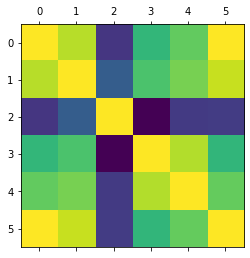

In [18]:
#creating a correlation heat map
plt.matshow(corr_df.corr())
plt.show()

Text(0.5, 1.0, 'School Nutrition Programs Correlation Matrix')

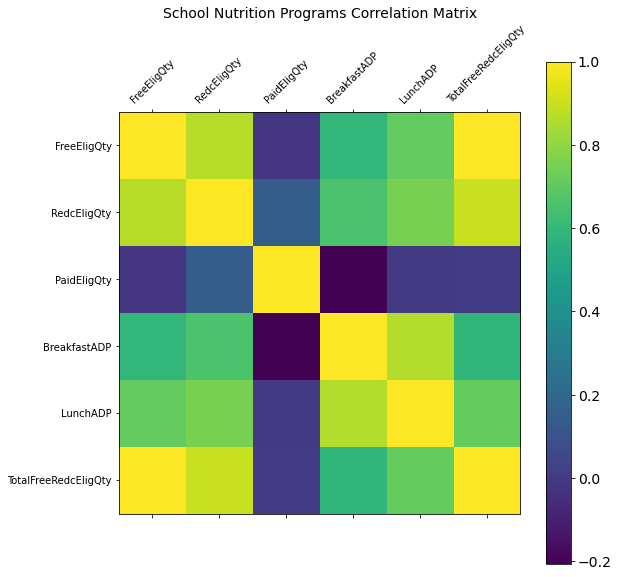

In [19]:
# Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(corr_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('School Nutrition Programs Correlation Matrix', fontsize=14) # add title

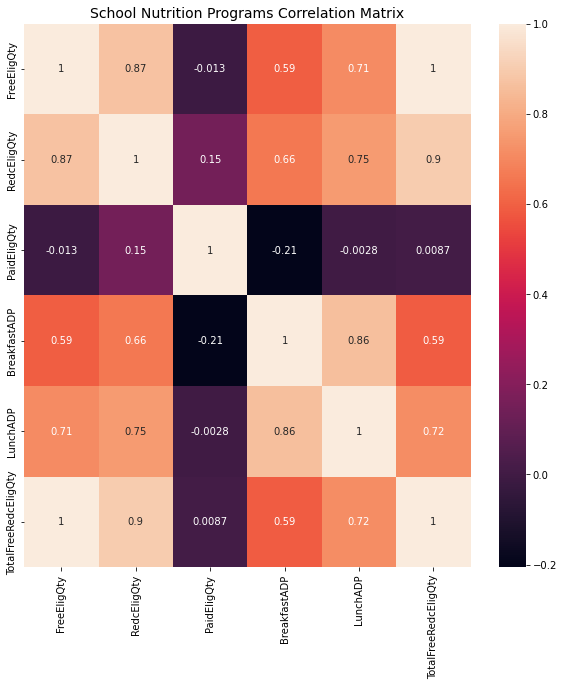

In [28]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
plt.title('School Nutrition Programs Correlation Matrix', fontsize=14)

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix
corr = sns.heatmap(corr_df.corr(), annot = True, ax = ax) 

plt.savefig("CorrelatonMatrix.png") #save figure

My biggest takeaway is that the number of students eligible for free or reduced price meals has a strong positive correlation with the average daily participation (ADP) for lunch. The correlation for Breakfast ADP is also positive but less strong. Additionally, there is a very week correlation between the number of students paying for meals and the breakfast/lunch ADP.

# 03. Scatterplots

## FreeEligQty & RedcEligQty

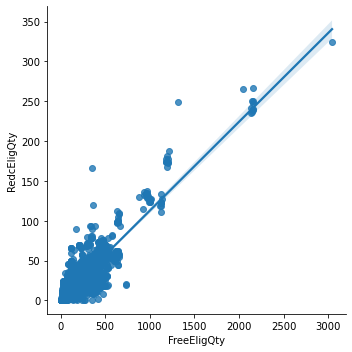

In [29]:
# creating scatterplot for number of students eligble for free and reduced priced meals
FreeEligQtyVsRedcEligQty = (
sns.lmplot(x = 'FreeEligQty', y = 'RedcEligQty', data = corr_df))

The points are clustered on the bottom left. There does seem to be a pretty strong correlation between the number of students eligible for reduced price meals in a district and those eligible for free meals.|

In [30]:
#save figure
FreeEligQtyVsRedcEligQty.savefig('FreeEligQtyVsRedcEligQty')

## FreeEligQty & Lunch ADP

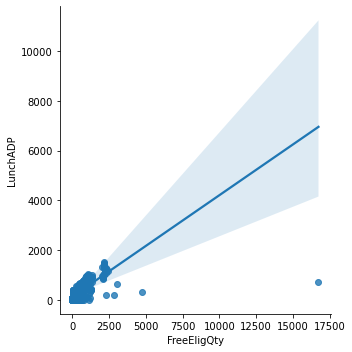

In [32]:
#scatterplot for number of students eligible for free meals and the avg daily participation for lunch
FreeEligQtyVsLunchADP = (sns.lmplot(x = 'FreeEligQty', y = 'LunchADP', data = corr_df))

The points are clustered on the bottom left with a clear outlier on the bottom right. The outlier is skewing the results

In [33]:
# save figure
FreeEligQtyVsLunchADP.savefig('FreeEligQtyVsLunchADP')

## RedcEligQty & Lunch ADP

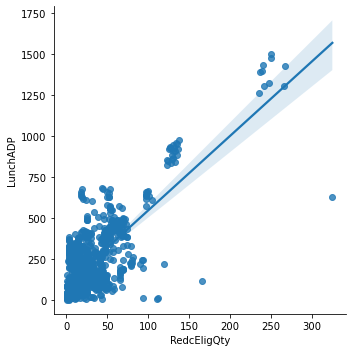

In [35]:
#scatterplot for number of students eligible for reduced price meals and the avg daily participation for lunch
RedcEligQtyVsLunchADP = (sns.lmplot(x = 'RedcEligQty', y = 'LunchADP', data = corr_df))

The points here are once again heavily clustered on the bottom left. Still, there is a clear positive correlation, with a few other smaller clusters. There appears to be an outlier but it doesn't seem to be affecting the graph too much.

In [36]:
#save figure
RedcEligQtyVsLunchADP.savefig('RedcEligQtyVsLunchADP')

## TotalFreeRedcEligQty & Lunch ADP

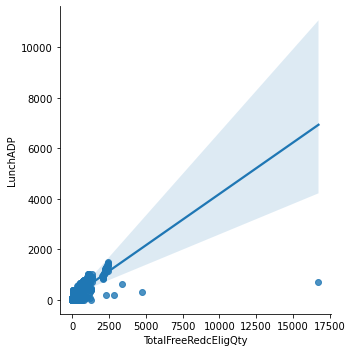

In [37]:
#scatterplot for number of students eligible for reduced price meals and the avg daily participation for lunch
TotalFreeRedcEligQtyVsLunchADP = (sns.lmplot(x = 'TotalFreeRedcEligQty', y = 'LunchADP', data = corr_df))

Once again, the points are clustered the bottom left with a positive correlation.

In [38]:
#save fig
TotalFreeRedcEligQtyVsLunchADP.savefig('TotalFreeRedcEligQtyVsLunchADP')

## Breakfast ADP & Lunch ADP

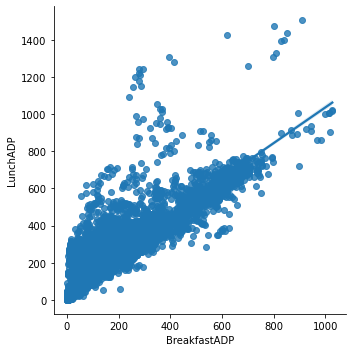

In [39]:
#scatterplot for avg daily participation in breakfast and lunch
BreakfastADPVsLunchADP = (sns.lmplot(x = 'BreakfastADP', y = 'LunchADP', data = corr_df))

These two variables have a very strong correlation and the clearest relationship. 

In [40]:
#save figure
BreakfastADPVsLunchADP.savefig('BreakfastADPVsLunchADP')

# 04. Pair plot

In [41]:
corr_df2 = data_nozero[['FreeEligQty', 'RedcEligQty', 'PaidEligQty', 'LunchADP', 'TotalFreeRedcEligQty']]

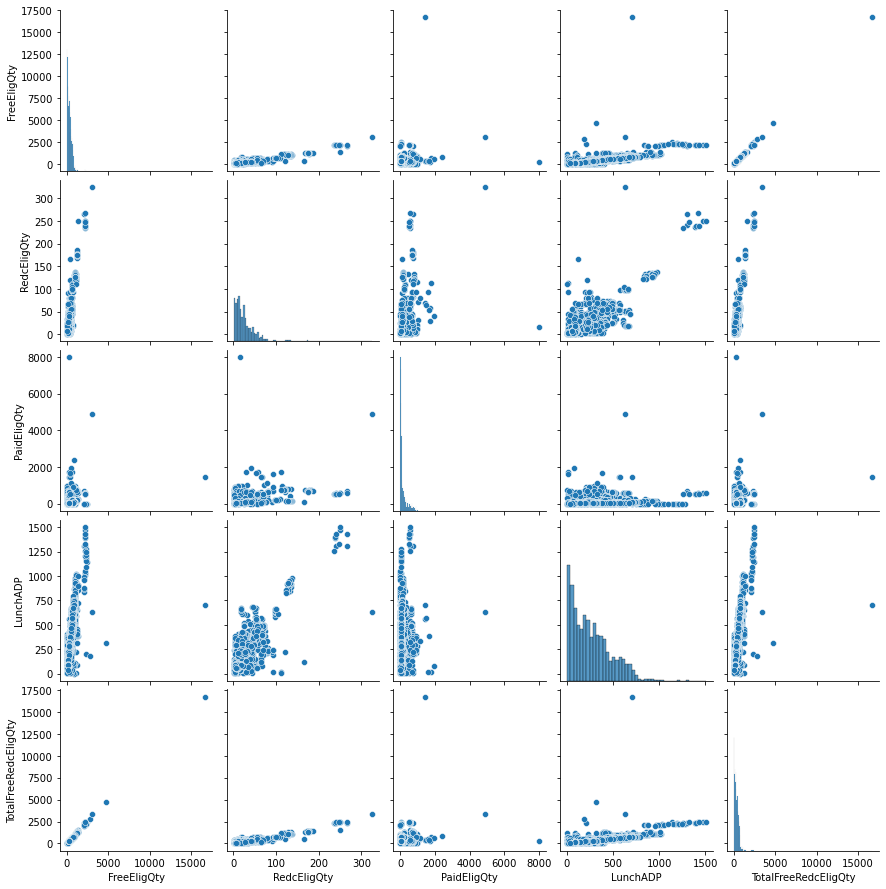

In [42]:
#creating pair plot using all variables of interest
pair_plot = sns.pairplot(corr_df2)

Many of the correlations are very weak due to lots of values being close to zero. For the distributions, they are also skewed to the right.

In [43]:
#save figure
pair_plot.savefig('pair plot')

# 05. Categorical Plot

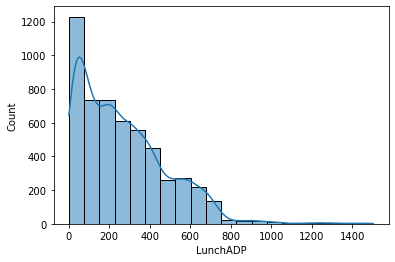

In [49]:
# Using a histogram to visualize the distribution of the total number of lunch meals served to determine categories

LunchADPHistogram = (sns.histplot(data_nozero['LunchADP'], bins =20, kde = True))

In [52]:
#creating categories
data_nozero.loc[data_nozero['LunchADP'] < 150, 'LunchADP_Category'] = 'Low lunch ADP'

In [53]:
data_nozero.loc[(data_nozero['LunchADP'] >= 150) & (data_nozero['LunchADP'] < 350), 'LunchADP_Category'] = 'Middle lunch ADP'

In [54]:
data_nozero.loc[data_nozero['LunchADP'] >= 350, 'LunchADP_Category'] = 'High lunch ADP'

In [55]:
data_nozero['LunchADP_Category'].value_counts(dropna = False)

NaN                 15213
Low lunch ADP        1955
Middle lunch ADP     1729
High lunch ADP       1612
Name: LunchADP_Category, dtype: int64

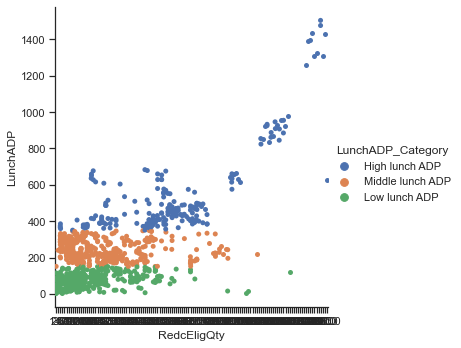

In [56]:
# Create a categorical plot in seaborn using the  categories created above
sns.set(style="ticks")
cat_plot = sns.catplot(x="RedcEligQty", y="LunchADP", hue='LunchADP_Category', data=data_nozero)

Notably, the number of points marked for High Lunch ADP seem to increase almost exponentionally as the quantity of students eligible for reduced price meals increases.

In [57]:
#save figure
cat_plot.savefig('categoricalplot')

# 06. Answering Previously Generated Questions

### Are students eligible for free or reduced priced meals opting to receive these meals at similar/higher/lower rates than students who pay full price?

There was a very weak correlation between the number of students who pay for lunch and the average daily participation (ADP) for lunch and breakfast. On the other hand, there was a moderately strong correlation between students who qualify for reduced price meals and lunch/breakfast ADPs. There was an even stronger correlation between students who qualify for free meals and lunch/breakfast ADPs. These three observations lead me to believe that students eligible for free or reduced price meals are opting to receiving these at higher rates than students who pay full price. There could be many reasons for this, including full-paying students having the resources to bring food from home or even full-paying students deciding that paying for school meals is too expensive.

# 07. Hypothesis Forming

If more students at a school are eligble for free or reduced price lunch, then that school will have a higher rate of students who opt into receiving the school's meals. 